In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [79]:
df = pd.read_excel("./Metrics/Final Metrics.xlsx",sheet_name=["RAG","LLM"])
rag_df = pd.read_csv("./Metrics/RAG.csv")
rag_df

,Case,K,Sample,Top-1,Top-K,Precision,Recall,F1 Score
0,Case 01,3,1000,0.9770,1.0000,0.9550,0.9550,0.9550
1,Case 03,3,1000,0.7580,0.9330,0.6147,0.6239,0.6177
2,Case 05,3,300,0.5667,0.7800,0.3886,0.2936,0.3218
3,Case 01,7,1000,0.9760,1.0000,0.9531,0.9531,0.9531
4,Case 03,7,1000,0.7580,0.9690,0.6147,0.6239,0.6177
5,Case 05,7,300,0.5667,0.8767,0.3886,0.2936,0.3218
6,Case 01,14,1000,0.9760,1.0000,0.9531,0.9531,0.9531
7,Case 03,14,1000,0.7580,0.9840,0.6147,0.6239,0.6177
8,Case 05,14,300,0.5700,0.9333,0.3906,0.2969,0.3250


In [80]:
rag_df = pd.read_csv("./Metrics/RAG.csv")

records = []
for _, row in rag_df.iterrows():
    records.append({
            "case": row["Case"],
            "k": row["K"],
            "top1": row["Top-1"],
            "topk": row["Top-K"],
            "precision": row["Precision"],
            "recall": row["Recall"],
            "f1": row["F1 Score"],
    })

df01 = pd.DataFrame(records)

metric_cols = ["top1", "topk", "precision", "recall", "f1"]

# Strip whitespace, convert empty strings to NaN, force numeric
for col in metric_cols:
    df01[col] = df01[col].astype(str).str.strip().replace("", np.nan)
    df01[col] = pd.to_numeric(df01[col], errors="coerce")

print(df01.dtypes)

df01[metric_cols] = df01[metric_cols].apply(pd.to_numeric, errors="coerce")

# Compute mean values across all 6 cases
mean_d01 = df01.groupby("k")[metric_cols].mean().reset_index()
print(mean_d01)

mean_d01.head()

case          object
k              int64
top1         float64
topk         float64
precision    float64
recall       float64
f1           float64
dtype: object
    k      top1      topk  precision    recall        f1
0   3  0.767233  0.904333   0.652767  0.624167  0.631500
1   7  0.766900  0.948567   0.652133  0.623533  0.630867
2  14  0.768000  0.972433   0.652800  0.624633  0.631933


,k,top1,topk,precision,recall,f1
0,3,0.767233,0.904333,0.652767,0.624167,0.631500
1,7,0.766900,0.948567,0.652133,0.623533,0.630867
2,14,0.768000,0.972433,0.652800,0.624633,0.631933


In [81]:
rag_df = pd.read_csv("./Metrics/LLM.csv")

records = []
for _, row in rag_df.iterrows():
    records.append({
            "case": row["Case"],
            "k": row["K"],
            "top1": row["Top-1"],
            "topk": row["Top-K"],
            "precision": row["Precision"],
            "recall": row["Recall"],
            "f1": row["F1 Score"],
    })

df02 = pd.DataFrame(records)

metric_cols = ["top1", "topk", "precision", "recall", "f1"]

# Strip whitespace, convert empty strings to NaN, force numeric
for col in metric_cols:
    df02[col] = df02[col].astype(str).str.strip().replace("", np.nan)
    df02[col] = pd.to_numeric(df02[col], errors="coerce")

print(df02.dtypes)

df02[metric_cols] = df02[metric_cols].apply(pd.to_numeric, errors="coerce")

# Compute mean values across all 6 cases
mean_d02 = df02.groupby("k")[metric_cols].mean().reset_index()
print(mean_d02)

mean_d02.head()

case          object
k              int64
top1         float64
topk         float64
precision    float64
recall       float64
f1           float64
dtype: object
    k      top1      topk  precision    recall        f1
0   3  0.826767  0.904333   0.716567  0.681867  0.691967
1   7  0.842000  0.948567   0.730933  0.702800  0.711633
2  14  0.846100  0.972767   0.736800  0.707400  0.716567


,k,top1,topk,precision,recall,f1
0,3,0.826767,0.904333,0.716567,0.681867,0.691967
1,7,0.842000,0.948567,0.730933,0.702800,0.711633
2,14,0.846100,0.972767,0.736800,0.707400,0.716567


In [82]:
pivot = df["RAG"].pivot(index="Case", columns="K", values="Top-1")
pivot

K,3,7,14
Case,,,
Case 01,0.9770,0.9760,0.976
Case 02,0.9310,0.9300,0.933
Case 03,0.7580,0.7580,0.758
Case 04,0.7080,0.7100,0.707
Case 05,0.5667,0.5667,0.570
Case 06,0.5633,0.5667,0.560


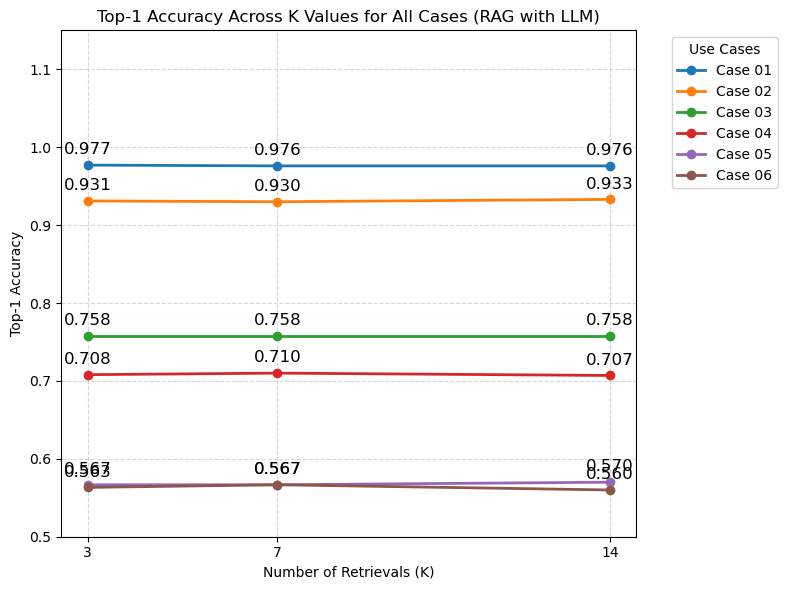

In [124]:
plt.figure(figsize=(8,6))
k_values = [3, 7, 14]


for case in pivot.index:
    y_vals = pivot.loc[case, k_values]

    # Plot the line
    plt.plot(
        k_values,
        y_vals,
        marker="o",
        linewidth=2,
        label=case
    )

    # Add labels on each point
    for k, y in zip(k_values, y_vals):
        plt.text(
            k, y + 0.01,                # slightly above the point
            f"{y:.3f}",                 # format to 3 decimals
            ha="center", va="bottom",
            fontsize=12
        )

plt.xticks(k_values)
plt.ylim(0.5, 1.15)
plt.xlabel("Number of Retrievals (K)")
plt.ylabel("Top-1 Accuracy")
plt.title("Top-1 Accuracy Across K Values for All Cases (RAG with LLM)")
plt.grid(linestyle="--", alpha=0.5)
plt.legend(title="Use Cases", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

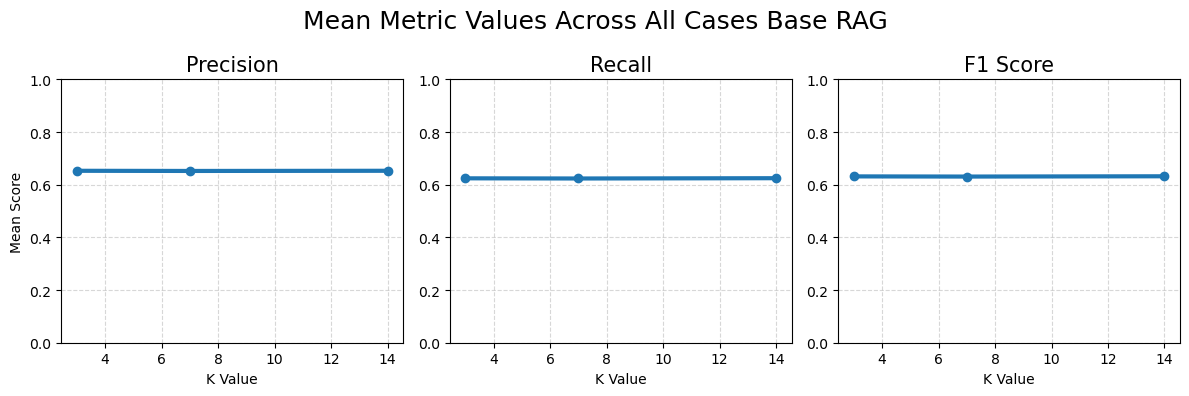

In [84]:
metrics = ["precision", "recall", "f1"]
metric_labels = ["Precision", "Recall", "F1 Score"]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for idx, metric in enumerate(metrics):
    ax = axes[idx]
    
    ax.plot(mean_d01["k"], mean_d01[metric], marker="o", linewidth=3)
    ax.set_title(metric_labels[idx], fontsize=15)
    ax.set_xlabel("K Value")
    ax.set_ylim(0, 1)
    ax.grid(True, linestyle="--", alpha=0.5)

    # Only first subplot gets Y label
    if idx == 0:
        ax.set_ylabel("Mean Score")

plt.suptitle("Mean Metric Values Across All Cases Base RAG", fontsize=18)
plt.tight_layout()
plt.show()

In [85]:
llm_df = pd.read_csv("./Metrics/LLM.csv")
pivot2 = llm_df.pivot(index="Case", columns="K", values="Top-1")
pivot2

K,3,7,14
Case,,,
Case 01,0.9770,0.977,0.9800
Case 03,0.8300,0.839,0.8450
Case 05,0.6733,0.710,0.7133


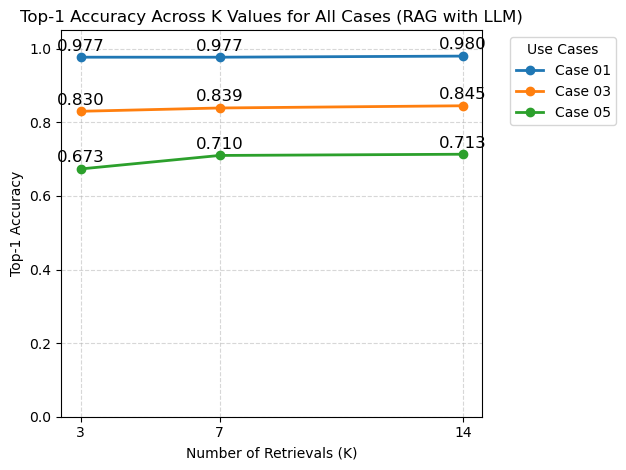

In [86]:

for case in pivot2.index:
    y_vals = pivot2.loc[case, k_values]

    # Plot the line
    plt.plot(
        k_values,
        y_vals,
        marker="o",
        linewidth=2,
        label=case
    )

    # Add labels on each point
    for k, y in zip(k_values, y_vals):
        plt.text(
            k, y + 0.01,                # slightly above the point
            f"{y:.3f}",                 # format to 3 decimals
            ha="center", va="bottom",
            fontsize=12
        )

plt.xticks(k_values)
plt.ylim(0, 1.05)
plt.xlabel("Number of Retrievals (K)")
plt.ylabel("Top-1 Accuracy")
plt.title("Top-1 Accuracy Across K Values for All Cases (RAG with LLM)")
plt.grid(linestyle="--", alpha=0.5)
plt.legend(title="Use Cases", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

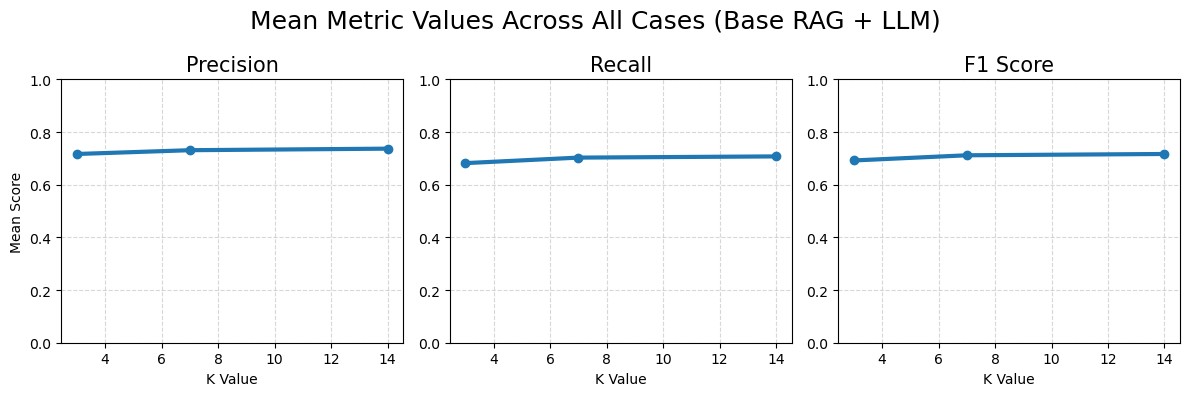

In [87]:
metrics = ["precision", "recall", "f1"]
metric_labels = ["Precision", "Recall", "F1 Score"]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for idx, metric in enumerate(metrics):
    ax = axes[idx]
    
    ax.plot(mean_d02["k"], mean_d02[metric], marker="o", linewidth=3)
    ax.set_title(metric_labels[idx], fontsize=15)
    ax.set_xlabel("K Value")
    ax.set_ylim(0, 1)
    ax.grid(True, linestyle="--", alpha=0.5)

    # Only first subplot gets Y label
    if idx == 0:
        ax.set_ylabel("Mean Score")

plt.suptitle("Mean Metric Values Across All Cases (Base RAG + LLM)", fontsize=18)
plt.tight_layout()
plt.show()

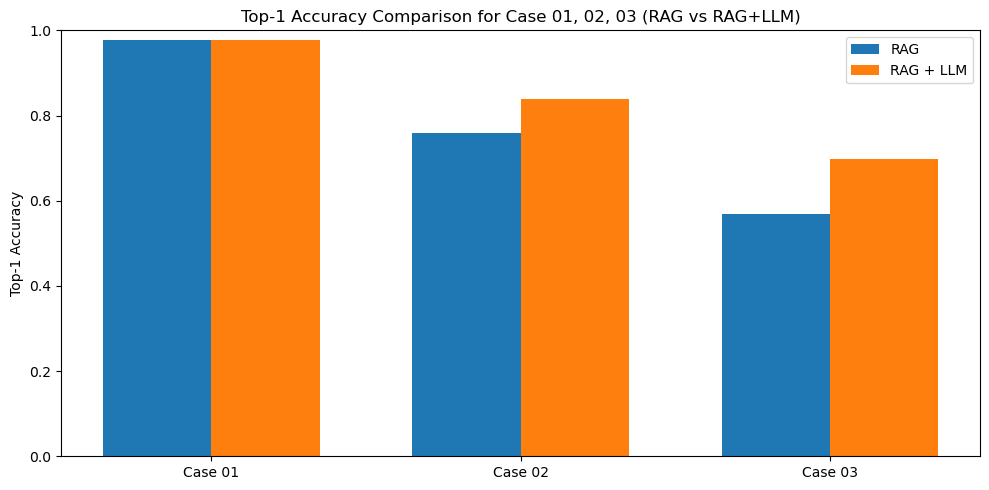

In [88]:
rag_df = pd.read_csv("./Metrics/RAG.csv")
llm_df = pd.read_csv("./Metrics/LLM.csv")
# Filter for Case 01, 02, 03 only
cases = ["Case 01", "Case 02", "Case 03"]

# Compute average Top-1 accuracy per case
rag_case_scores = rag_df.groupby("Case")["Top-1"].mean()
llm_case_scores = llm_df.groupby("Case")["Top-1"].mean()

# Prepare bar chart
labels = cases
x = np.arange(len(labels))  # bar positions
width = 0.35

plt.figure(figsize=(10, 5))

plt.bar(x - width/2, rag_case_scores, width, label="RAG")
plt.bar(x + width/2, llm_case_scores, width, label="RAG + LLM")

plt.xticks(x, labels)
plt.ylabel("Top-1 Accuracy")
plt.title("Top-1 Accuracy Comparison for Case 01, 02, 03 (RAG vs RAG+LLM)")
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()

plt.show()

In [89]:
rag_df

,Case,K,Sample,Top-1,Top-K,Precision,Recall,F1 Score
0,Case 01,3,1000,0.9770,1.0000,0.9550,0.9550,0.9550
1,Case 03,3,1000,0.7580,0.9330,0.6147,0.6239,0.6177
2,Case 05,3,300,0.5667,0.7800,0.3886,0.2936,0.3218
3,Case 01,7,1000,0.9760,1.0000,0.9531,0.9531,0.9531
4,Case 03,7,1000,0.7580,0.9690,0.6147,0.6239,0.6177
5,Case 05,7,300,0.5667,0.8767,0.3886,0.2936,0.3218
6,Case 01,14,1000,0.9760,1.0000,0.9531,0.9531,0.9531
7,Case 03,14,1000,0.7580,0.9840,0.6147,0.6239,0.6177
8,Case 05,14,300,0.5700,0.9333,0.3906,0.2969,0.3250


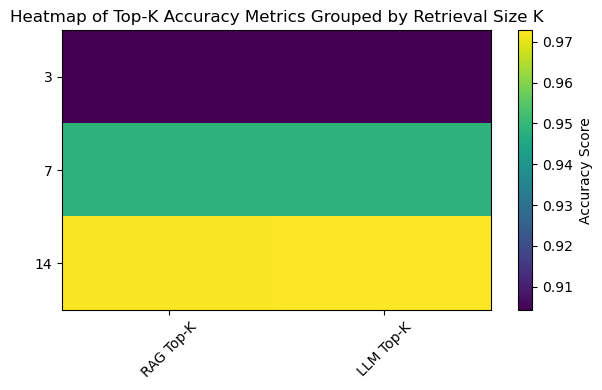

In [97]:
rag_df = pd.read_csv("./Metrics/RAG.csv")
llm_df = pd.read_csv("./Metrics/LLM.csv")

metrics = ["Top-K"]

# Step 1: Compute average metric scores grouped by K
rag_grouped = rag_df.groupby("K")[metrics].mean()
llm_grouped = llm_df.groupby("K")[metrics].mean()

# Step 2: Build a combined heatmap table
# Rows = K values, Columns = RAG / LLM × metrics
heatmap_df = pd.DataFrame()

for metric in metrics:
    heatmap_df[f"RAG {metric}"] = rag_grouped[metric]
    heatmap_df[f"LLM {metric}"] = llm_grouped[metric]

# Step 3: Plot heatmap
plt.figure(figsize=(6, 4))
plt.imshow(heatmap_df, aspect='auto')

# Labels
plt.xticks(ticks=np.arange(len(heatmap_df.columns)), labels=heatmap_df.columns, rotation=45)
plt.yticks(ticks=np.arange(len(heatmap_df.index)), labels=heatmap_df.index)

plt.colorbar(label="Accuracy Score")
plt.title("Heatmap of Top-K Accuracy Metrics Grouped by Retrieval Size K")
plt.tight_layout()
plt.show()

In [91]:
dfs = []
# metrics = ["Top-1","Top-K","Precision","Recall","F1 Score"]
metrics = ["Top-1"]
rag_df["method"] = "RAG"
llm_df["method"] = "RAG + LLM"
dfs.append(rag_df)
dfs.append(llm_df)


In [92]:
# COMBINE ALL SHEETS INTO ONE DATAFRAME
dfc = pd.concat(dfs, ignore_index=True)
print("\nCombined DataFrame:\n", dfc.head())

# GROUP ONLY BY METHOD
agg_df = dfc.groupby("method")[metrics].mean().reset_index()

print("\nAggregated Metrics by Method:\n", agg_df)

methods = agg_df["method"].tolist()


Combined DataFrame:
       Case  K  Sample   Top-1  Top-K  Precision  Recall  F1 Score method
0  Case 01  3    1000  0.9770  1.000     0.9550  0.9550    0.9550    RAG
1  Case 03  3    1000  0.7580  0.933     0.6147  0.6239    0.6177    RAG
2  Case 05  3     300  0.5667  0.780     0.3886  0.2936    0.3218    RAG
3  Case 01  7    1000  0.9760  1.000     0.9531  0.9531    0.9531    RAG
4  Case 03  7    1000  0.7580  0.969     0.6147  0.6239    0.6177    RAG

Aggregated Metrics by Method:
       method     Top-1
0        RAG  0.767378
1  RAG + LLM  0.838289


In [93]:
def plot_metric(metric_name):
    plt.figure(figsize=(10, 5))

    x = np.arange(len(methods))
    values = agg_df[metric_name].tolist()

    plt.bar(x, values)

    plt.xticks(x, methods, rotation=30, ha="right")
    plt.ylabel("Score")
    plt.ylim(0, 1)
    plt.title(f"{metric_name.replace('_', ' ').title()} Comparison Across Methods")
    plt.grid(axis="y", linestyle="--", alpha=0.5)

    # Add numeric labels
    for i, v in enumerate(values):
        plt.text(i, v + 0.02, f"{v:.3f}", ha="center", fontsize=10)

    plt.tight_layout()
    plt.show()

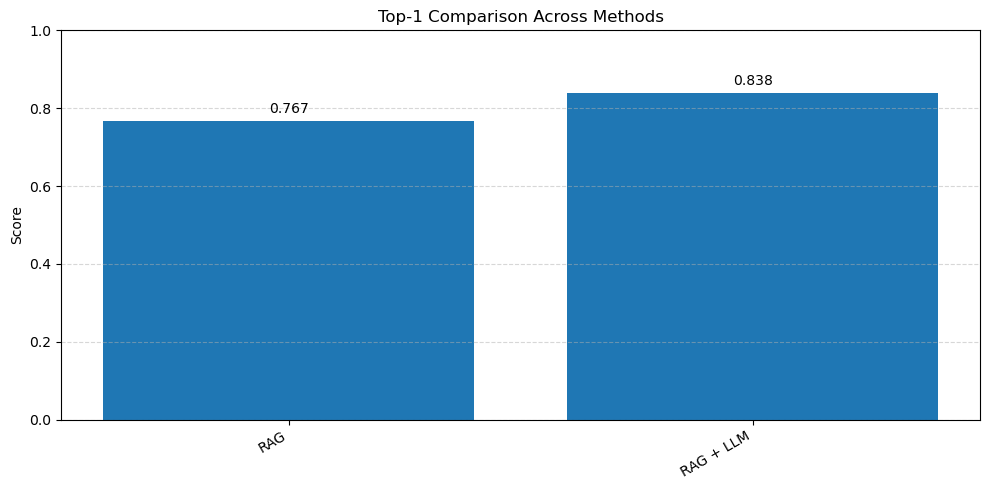

In [94]:
# GENERATE ALL METRIC VISUALIZATIONS
for m in metrics:
    plot_metric(m)

In [98]:
pivot03 = rag_df.pivot(index="Case", columns="K", values="Top-K")
pivot03

K,3,7,14
Case,,,
Case 01,1.000,1.0000,1.0000
Case 03,0.933,0.9690,0.9840
Case 05,0.780,0.8767,0.9333


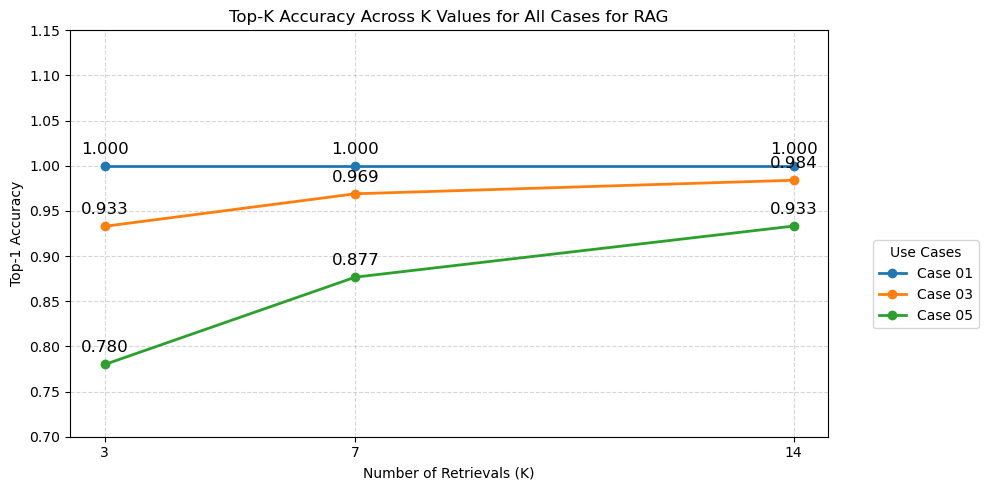

In [121]:
plt.figure(figsize=(10, 5))

for case in pivot03.index:
    y_vals = pivot03.loc[case, k_values]

    # Plot the line
    plt.plot(
        k_values,
        y_vals,
        marker="o",
        linewidth=2,
        label=case
    )

    # Add labels on each point
    for k, y in zip(k_values, y_vals):
        plt.text(
            k, y + 0.01,                # slightly above the point
            f"{y:.3f}",                 # format to 3 decimals
            ha="center", va="bottom",
            fontsize=12
        )

plt.xticks(k_values)
plt.ylim(0.7, 1.15)
plt.xlabel("Number of Retrievals (K)")
plt.ylabel("Top-1 Accuracy")
plt.title("Top-K Accuracy Across K Values for All Cases for RAG")
plt.grid(linestyle="--", alpha=0.5)
plt.legend(title="Use Cases", bbox_to_anchor=(1.05, 0.5), loc="upper left")
plt.tight_layout()
plt.show()